# Lineaire Regressie in Python
## 1.3 Statmodels library

Voor Python bestaat een enorm aanbod aan open source libraries met voorgeprogrammeerde functies. De meeste libaries zijn uitvoerig getest en optimaal geprogrammeerd (qua efficiency) in bv Fortran, C++, matlab or R. Steeds meer data scientists kiezen ervoor om deze libraries vanuit Python te gebruiken omdat de taal kort, laagdrempelig en goed leesbaar is.

Een van de libraries is statmodels, die bevat al een functie om een lineaire regressielijn te fitten. Hier laten we zien hoe je die kunt gebruiken.

We laden wederom de data en stellen een input matrix $X$ samen met een bias $x_0 = 1$ en een vector met correcte uitkomsten $y$

In [1]:
import pandas as pd
wijnen = pd.read_csv('winequality-red.csv', delimiter=';')

wijnen['bias'] = 1
X = wijnen[['bias', 'alcohol']].as_matrix()
y = wijnen.quality.as_matrix()

Vervolgens kunnen we statsmodels importeren en een OLS model (Ordinary Least Squares) fitten. De model.params geeft ons de coefficienten:

- params[0]: het snijpunt met de y-as (in onze Normal Equation aanpak $\theta_0$)
- params[1]: de richttingscoefficient (in onze Normal Equation aanpak $\theta_1$)

In [2]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
model.params

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([ 1.87497489,  0.36084177])

We zien dat de coefficienten gelijk zijn aan die van de Normal Equation. Hieronder de code om het resultaat nogmaals te visualiseren. 

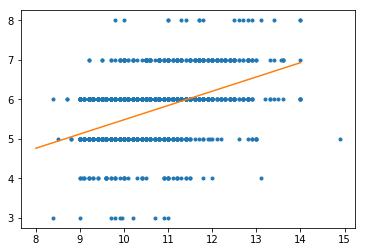

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(wijnen.alcohol, wijnen.quality, '.')
line_x=np.array([8,14])
line_y=line_x * model.params[1] + model.params[0]
plt.plot(line_x, line_y, '-')